In [1]:
# Project 1 Team 3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

archive_path = "archive/MoviesOnStreamingPlatforms.csv"
ticket_sales_path = "TicketSales/AnnualTicketSales.csv"
gross_path = "TicketSales/HighestGrossers.csv"
creative_types_path = "TicketSales/PopularCreativeTypes.csv"
top_distributors_path = "TicketSales/TopDistributors.csv"
top_genres_path = "TicketSales/TopGenres.csv"
top_gross_ratings_path = "TicketSales/TopGrossingRatings.csv"
top_gross_source_path = "TicketSales/TopGrossingSources.csv"
top_production_path = "TicketSales/TopProductionMethods.csv"
subscriber_count_path = "subscription/svod-subscriber-count.csv"
ticket_sold_path = "subscription/tickets-sold-at-box-offices.csv"
subscription_price_path = "subscription/svod-services-monthly-subscription-price.csv"
user_share_path = "subscription/svod-service-user-shares.csv"
hulu_subscribers = "subscription/hulus-paying-subscribers-copy.csv"
disney_subscribers = "subscription/disney-subscribers-count-copy.csv"
home_vs_theater_path = "subscription/adults-who-preferred-to-watch-films-in-a-theater-or-at-home.csv"
netflix_subscribers = "subscription/statistic_id250937_quarterly-netflix-paid-streaming-subscribers-in-the-us-and-canada-2013-2023-copy.csv"


df_archive = pd.read_csv(archive_path)
df_ticket_sales = pd.read_csv(ticket_sales_path)
df_gross = pd.read_csv(gross_path)
df_creative_types = pd.read_csv(creative_types_path)
df_top_distributors = pd.read_csv(top_distributors_path)
df_genres = pd.read_csv(top_genres_path)
df_ratings = pd.read_csv(top_gross_ratings_path)
df_source = pd.read_csv(top_gross_source_path)
df_production = pd.read_csv(top_production_path)
df_sub_count = pd.read_csv(subscriber_count_path)
df_ticket_sold = pd.read_csv(ticket_sold_path)
df_sub_price = pd.read_csv(subscription_price_path)
df_user_share = pd.read_csv(user_share_path)
df_hulu = pd.read_csv(hulu_subscribers)
df_disney = pd.read_csv(disney_subscribers)
df_home_vs_theater = pd.read_csv(home_vs_theater_path)
df_netflix = pd.read_csv(netflix_subscribers)





In [2]:
# Merge Hulu, Disney, and Netflix Subs

In [3]:
left = pd.read_csv(hulu_subscribers)
right = pd.read_csv(disney_subscribers)
right2 = pd.read_csv(netflix_subscribers)


result = pd.merge(left, right, on=["Quarter", "Year", "Subs", "Company"], how="outer")

final_result = pd.merge(result, right2, on=["Quarter", "Year", "Subs", "Company"], how="outer")

final_result

,Quarter,Year,Subs,Company
0,Q4,2010,0.30,Hulu
1,Q1,2011,0.50,Hulu
2,Q2,2011,0.90,Hulu
3,Q3,2011,1.20,Hulu
4,Q4,2011,1.50,Hulu
...,...,...,...,...
88,Q1,2022,74.58,Netflix
89,Q2,2022,73.28,Netflix
90,Q3,2022,73.39,Netflix
91,Q4,2022,74.30,Netflix


In [4]:
#Define data that seperates the covid vs precovid years
#Precovid years 2017-2019 covid years 2020-2022
PreCovid_Yearly = final_result[~final_result['Year'].isin([2020,2021,2022,2023])]



PreCovid_Yearly

,Quarter,Year,Subs,Company
0,Q4,2010,0.30,Hulu
1,Q1,2011,0.50,Hulu
2,Q2,2011,0.90,Hulu
3,Q3,2011,1.20,Hulu
4,Q4,2011,1.50,Hulu
5,Q1,2012,2.00,Hulu
6,Q2,2012,NaN,Hulu
7,Q3,2012,NaN,Hulu
8,Q4,2012,3.00,Hulu
9,Q1,2013,4.00,Hulu


In [5]:
Covid_Yearly = final_result[~final_result['Year'].isin([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2023])]



Covid_Yearly

,Quarter,Year,Subs,Company
24,Q1,2020,30.40,Hulu
25,Q2,2020,32.10,Hulu
26,Q3,2020,35.50,Hulu
27,Q4,2020,36.60,Hulu
28,Q1,2021,39.40,Hulu
29,Q2,2021,41.60,Hulu
30,Q3,2021,42.80,Hulu
31,Q4,2021,43.80,Hulu
32,Q1,2022,45.30,Hulu
33,Q2,2022,45.60,Hulu


In [15]:
#Drop the quarter column from our dataframes and clean it up
#Notice we had multiple years due to the data was calculated in quarters for the years
#PreCovid_Subs= PreCovid_Yearly.drop(columns=["Quarter"])
#try groupby method
final_PreCovid = PreCovid_Subs.groupby(['Year', 'Company']).agg({'Subs': ['mean']})
#create a column and reset index
final_PreCovid.columns = ['Subs(million)']

final_PreCovid = final_PreCovid.reset_index()


final_PreCovid

,Year,Company,Subs(million)
0,2010,Hulu,0.3000
1,2011,Hulu,1.0250
2,2012,Hulu,2.5000
3,2013,Hulu,4.5000
4,2013,Netflix,29.5425
5,2014,Hulu,6.0000
6,2014,Netflix,35.8600
7,2015,Hulu,9.0000
8,2015,Netflix,41.7125
9,2016,Hulu,12.0000


In [18]:
#same thing we did but for Covid years
#Covid_Subs= Covid_Yearly.drop(columns=["Quarter"])
#try groupby method
final_Covid = Covid_Subs.groupby(['Year', 'Company']).agg({'Subs': ['mean']})
#create a column and reset index
final_Covid.columns = ['Subs(million)']

final_Covid = final_Covid.reset_index()


final_Covid

,Year,Company,Subs(million)
0,2020,Disney,89.0500
1,2020,Hulu,33.6500
2,2020,Netflix,72.4725
3,2021,Disney,108.1500
4,2021,Hulu,41.9000
5,2021,Netflix,74.3925
6,2022,Disney,145.9500
7,2022,Hulu,46.0750
8,2022,Netflix,73.8875


Text(0, 0.5, '# of Streaming Subscriptions(Millions)')

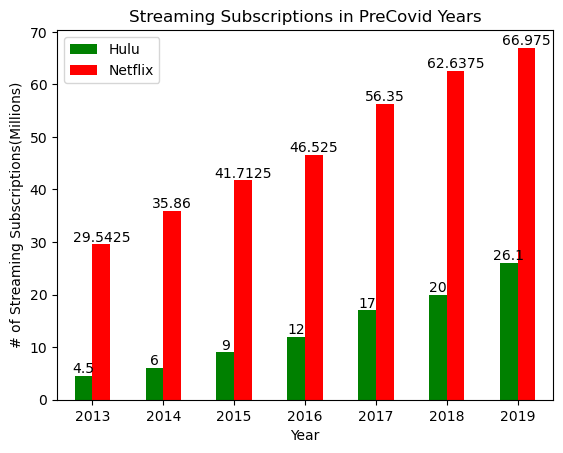

In [49]:
#make bar charts showing the Precovid years

bar_PreCoviddf = pd.DataFrame({'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019],
                   'Hulu': [4.5000, 6.0000, 9.0000, 12.0000, 17.0000, 20.0000, 26.1000],
                   'Netflix': [29.5425, 35.8600, 41.7125, 46.5250, 56.3500, 62.6375, 66.9750]})
                   

#plot columns on bar chart
ax=bar_PreCoviddf[['Year', 'Hulu', 'Netflix']].plot(x='Year', color={"Hulu": "green", "Netflix": "red"}, title="Streaming Subscriptions in PreCovid Years", kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation='horizontal')

plt.ylabel("# of Streaming Subscriptions(Millions)") 

Text(0, 0.5, '# of Streaming Subscriptions(Millions)')

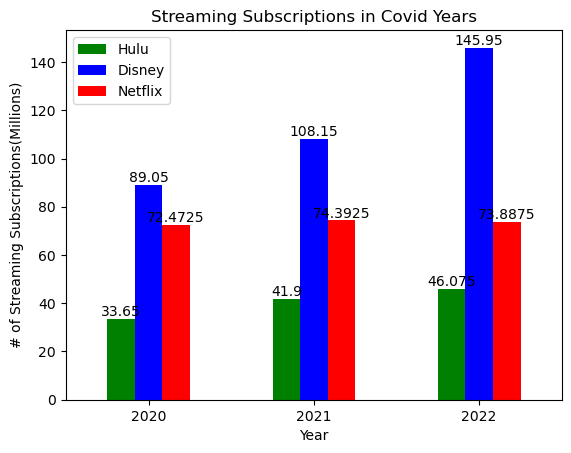

In [48]:

bar_Coviddf = pd.DataFrame({'Year': [2020, 2021, 2022],
                   'Hulu': [33.6500, 41.9000, 46.0750],
                    'Disney': [89.0500, 108.1500, 145.9500],
                   'Netflix': [72.4725, 74.3925, 73.8875]})
                   

#plot columns on bar chart

ax=bar_Coviddf[['Year', 'Hulu', 'Disney', 'Netflix']].plot(x='Year', color={"Hulu": "green", "Disney":"blue", "Netflix": "red"},  title="Streaming Subscriptions in Covid Years", kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation='horizontal')

plt.ylabel("# of Streaming Subscriptions(Millions)") 